In [26]:
import time
import cv2
import matplotlib.pyplot as plt

import boto3
from os import makedirs
from os.path import join, basename
from sys import argv
import json
import requests

## Result of Detection
Here is [AWS Rekognition Docs](https://docs.aws.amazon.com/ja_jp/rekognition/latest/dg/text-detection.html)


boto3 is library for Amazon rekognition api.
```
pip install boto3
```

[This page](https://www.apibank.jp/contents/howto-use/use_amzon-rekognition/) is very helpful for implementation Amazon rekognition.

Amazon rekoginition doesn't have Japanese library just English and symbols only.  
So, it's difficult to detect Japanese words.  

But [This article](https://data.gunosy.io/entry/ocr-tesseract-deeplearning#%E5%AF%BE%E5%BF%9C%E3%82%BF%E3%82%B9%E3%82%AF-1) can detect Japanese words by Amazon rekognition.

Amazon rekognition cann't response charactor region but sentence region.

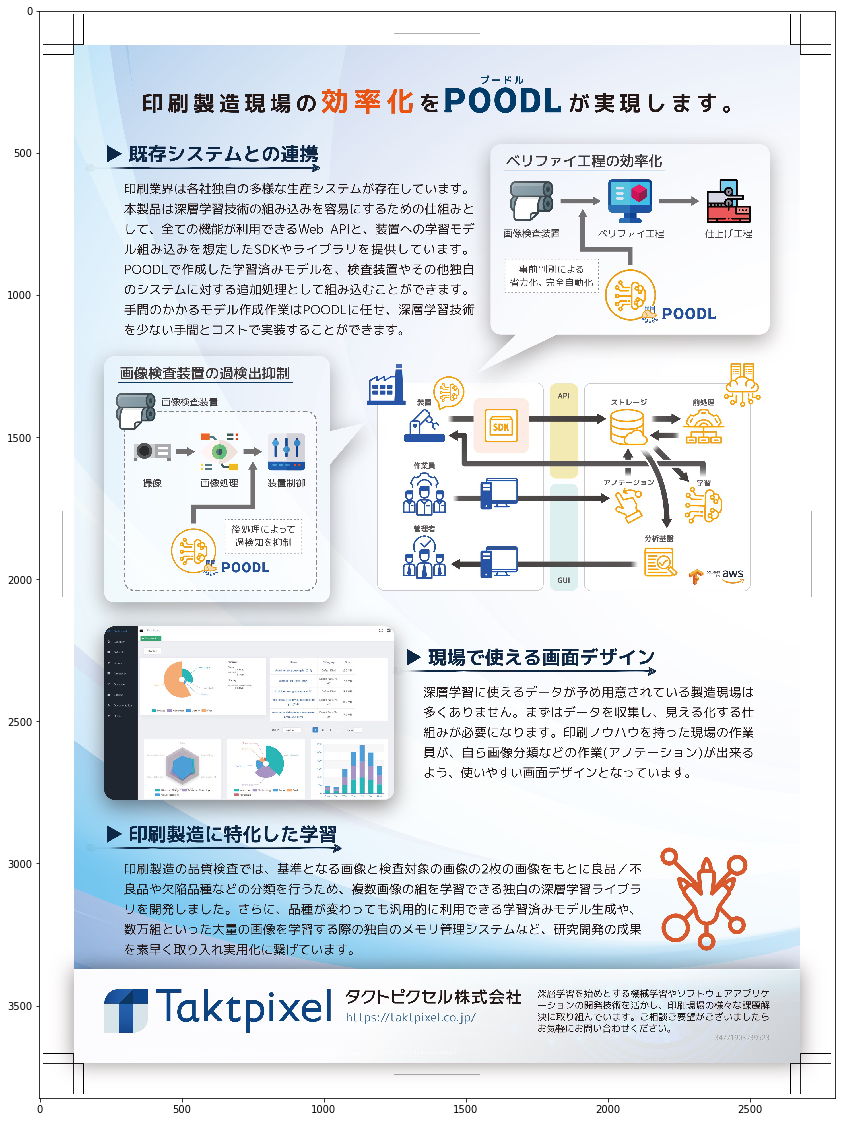

In [27]:
image_path = '../images/POODL_Flyer_Design_ja_190322_back_rgb_300dpi.jpg'
image = cv2.imread(image_path)
org_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.imshow(org_image)

In [28]:
client = boto3.client('rekognition','ap-northeast-1')
img_file_path = '../images/POODL_Flyer_Design_ja_190322_back_cmyk_300dpi.jpg'
img = open(img_file_path, 'rb')
img_byte = img.read()
response = client.detect_text(
    Image={
        'Bytes': img_byte
    }
)

for value in response['TextDetections']:
    print(value['DetectedText'])

-NJ
EP 1L r POODL
EDRR
RIUEUIGOEHAHRBEOIIL
T, loEweb Al
^UFTI fIR
POODLTEELLTTHETTZOIE
HES
3i6009116
POODL
tttTFFtPOoDlil rey
oE
11
fEF
#S
m#
POODL
I
3<h.
T
At,
d,
:
RLUR DE
Taktpixel
-NJ
EP
1L
r
POODL
EDRR
RIUEUIGOEHAHRBEOIIL
T,
loEweb Al
^UFTI
fIR
POODLTEELLTTHETTZOIE
HES
3i6009116
POODL
tttTFFtPOoDlil rey
oE
11
fEF
#S
m#
POODL
I
3<h.
T
At,
d,
:
RLUR DE
Taktpixel


In [29]:
start = time.time()

client = boto3.client('rekognition','ap-northeast-1')
img_file_path = '../images/POODL_Flyer_Design_ja_190322_back_cmyk_300dpi.jpg'
img = open(img_file_path, 'rb')
img_byte = img.read()
response = client.detect_text(
    Image={
        'Bytes': img_byte
    }
)

boxes = []

for value in response['TextDetections']:
    #print(value['Geometry']['BoundingBox'])
    left = value['Geometry']['BoundingBox']['Left']
    right = left + value['Geometry']['BoundingBox']['Width']
    top = value['Geometry']['BoundingBox']['Top']
    bottom = left + value['Geometry']['BoundingBox']['Height']
    
    boxes.append([left, top, right, bottom])
    
detect_time = time.time() - start
print('detect_time: ', detect_time)    

('detect_time: ', 4.740006923675537)


In [23]:
boxes

[[0.545525848865509,
  0.054764214903116226,
  0.6111707165837288,
  0.5590286990627646],
 [0.12279674410820007,
  0.06860053539276123,
  0.6571203172206879,
  0.15154625475406647],
 [0.09948772192001343,
  0.15493004024028778,
  0.5405128300189972,
  0.11449228879064322],
 [0.09431439638137817,
  0.17329339683055878,
  0.5435897409915924,
  0.1085692998021841],
 [0.10451987385749817,
  0.19130514562129974,
  0.5446106493473053,
  0.12026543542742729],
 [0.6974371671676636,
  0.19501158595085144,
  0.8964217454195023,
  0.7124776486307383],
 [0.10153846442699432,
  0.22955739498138428,
  0.5466666668653488,
  0.11504180449992418],
 [0.6010256409645081,
  0.2310577630996704,
  0.6646153852343559,
  0.6115282662212849],
 [0.23589743673801422,
  0.24906226992607117,
  0.3189743608236313,
  0.2471502497792244],
 [0.7752270102500916,
  0.2685679793357849,
  0.8512780070304871,
  0.7909801043570042],
 [0.10564102232456207,
  0.2843210697174072,
  0.5548717826604843,
  0.12129330448806286],
 

## Plot to Image

In [24]:
h, w, _ = image.shape

for b in boxes:
    image = cv2.rectangle(image, (int(b[0]*w), h - int(b[1]*h)), (int(b[2]*w), h - int(b[3]*h)), (0, 255, 0), 2)

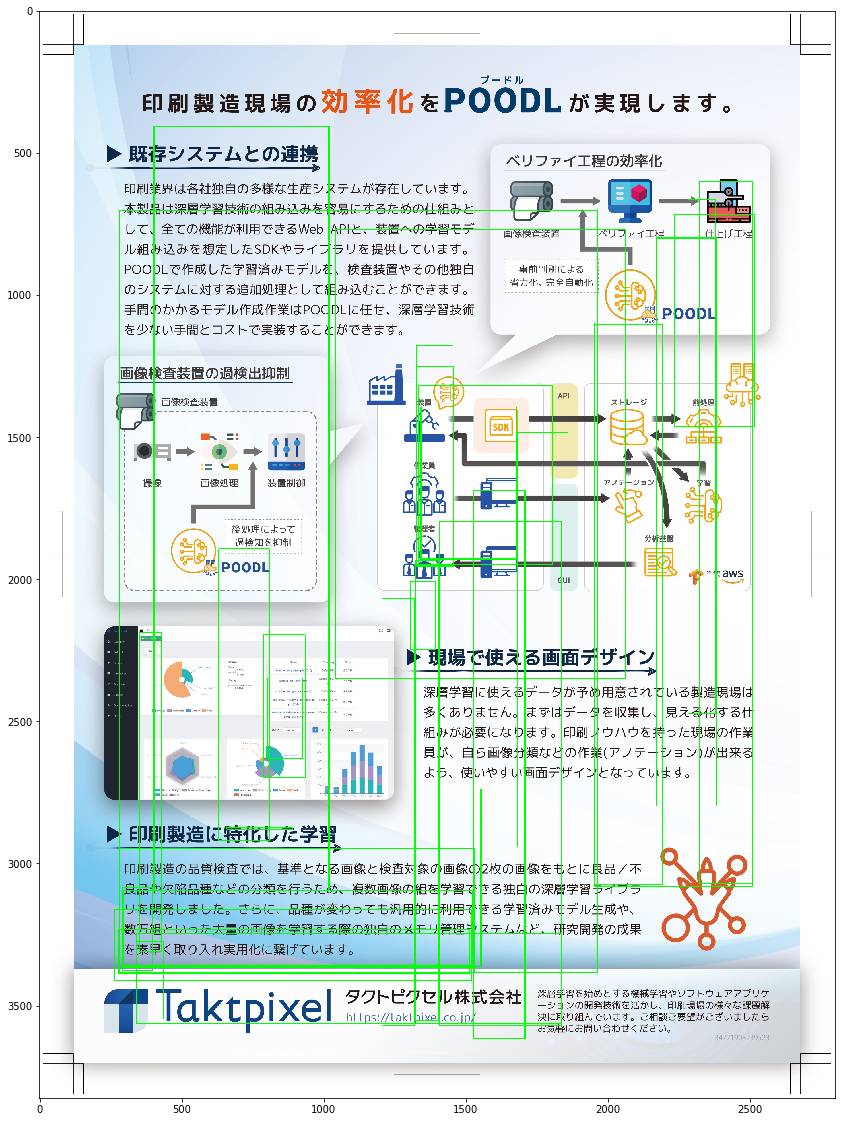

In [25]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20, 20))
plt.imshow(image)